In [79]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as stats

## Chargement des données, suppression des variables qualitatives

In [80]:
df = pd.read_csv('../dataset/data_cleaned_quali.csv')
df.info()
colonnes_object = df.select_dtypes(include=['object', 'bool']).columns.tolist()
df_quantitatifs = df.drop(columns=colonnes_object + ["Attrition"])
df_quantitatifs.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   bool  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                 

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Centrage des données

In [81]:
mean = df_quantitatifs.mean(axis=0)
df_centered = df_quantitatifs-mean
df_centered.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.07619,299.514286,-8.192517,-1023.865306,28.108844,-509.931293,5165.896599,5.306803,-4.209524,-0.793878,-3.279592,-2.79932,-1.008163,-0.229252,-2.187755,0.876871
1,12.07619,-523.485714,-1.192517,-1022.865306,-4.891156,-1372.931293,10593.896599,-1.693197,7.790476,0.206122,-1.279592,0.20068,2.991837,2.770748,-1.187755,2.876871
2,0.07619,570.514286,-7.192517,-1020.865306,26.108844,-4412.931293,-11917.103401,3.306803,-0.209524,-0.793878,-4.279592,0.20068,-7.008163,-4.229252,-2.187755,-4.123129
3,-3.92381,589.514286,-6.192517,-1019.865306,-9.891156,-3593.931293,8845.896599,-1.693197,-4.209524,-0.793878,-3.279592,0.20068,0.991837,2.770748,0.812245,-4.123129
4,-9.92381,-211.485714,-7.192517,-1017.865306,-25.891156,-3034.931293,2318.896599,6.306803,-3.209524,0.206122,-5.279592,0.20068,-5.008163,-2.229252,-0.187755,-2.123129


In [82]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(df_centered)
cls.components_

array([[ 5.31766719e-05, -1.81543064e-03,  3.07158090e-05,
         1.04193586e-03, -4.48275168e-05,  4.08313772e-02,
         9.99163855e-01,  7.55263685e-06, -3.68016938e-06,
        -4.08390029e-06,  5.16476748e-05,  1.59326574e-07,
        -8.37848189e-06, -1.51553907e-06,  4.92333659e-06,
        -1.37329228e-05],
       [ 9.63953157e-04,  8.39357226e-04, -3.22781315e-05,
        -2.03249351e-03, -6.42381035e-05,  9.99162165e-01,
        -4.08277749e-02,  7.88625541e-05, -2.09131658e-05,
         1.36189637e-06,  1.27633346e-03, -5.98676446e-06,
         6.72029864e-04,  2.80966281e-04,  2.36369009e-04,
         2.62841684e-04],
       [-4.64071245e-05, -6.10306569e-02,  4.35497992e-04,
         9.98132291e-01,  1.15189469e-03,  2.03141622e-03,
        -1.23472213e-03, -2.85654896e-06, -8.61134930e-05,
         8.61583854e-05, -3.92387093e-05,  4.93696400e-05,
        -1.33359715e-05, -1.70732549e-05, -1.16869611e-05,
        -1.24251670e-05],
       [-1.56512970e-04, -9.98132754e

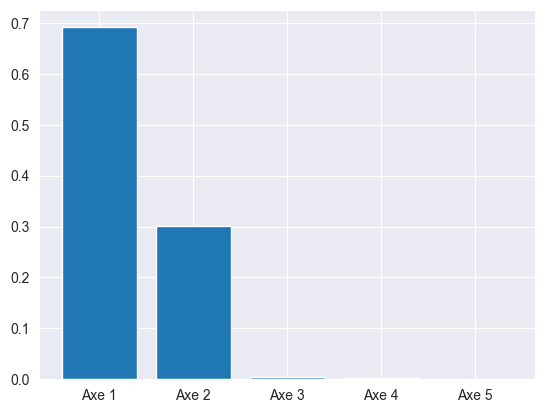

In [83]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

## Deux premiers axes factoriels de l'ACP

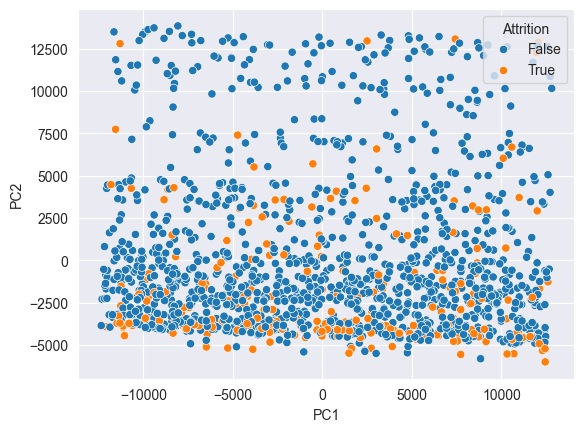

In [84]:
df_attrition = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()